more detailed look at daily air quality data

In [1]:
import os

import pandas as pd

from air_brain.data.get_data import DATA_DIR

filename = os.path.join(DATA_DIR, "daily_air_quality.csv")

In [2]:
df = pd.read_csv(filename)
df.date = pd.to_datetime(df.date)
df.head(1)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN


In [3]:
# which sites have which parameters?
pd.crosstab(df.site, df.parameter)

parameter,CO,NO2,NO2_200,NO2_500,OZONE,PM10,PM10B,PM10_640,PM25,PM25(2),PM25B,PM25T,PM25_640,SO2
site,,,,,,,,,,,,,,
Avalon,0,0,0,0,0,0,0,0,0,0,0,2141,897,1766
Clairton,0,0,0,0,0,0,0,0,0,0,0,0,977,329
Flag Plaza,1763,0,0,0,0,2239,0,0,0,0,0,0,0,0
Glassport High Street,0,0,0,0,0,3238,0,0,0,0,0,0,0,0
Harrison Township,0,3018,103,91,3119,0,0,0,0,0,0,0,0,0
Lawrenceville,0,0,0,0,3223,0,0,0,0,0,1539,18,0,0
Lawrenceville 2,3248,0,0,0,0,0,0,0,0,0,0,0,0,3230
Liberty,0,0,0,0,0,0,0,0,0,0,0,0,0,3260
Liberty 2,0,0,0,0,0,2756,0,466,0,655,0,2051,461,0


In [4]:
# how often air there health advisories, and from what parameters?
pd.crosstab(df.parameter, df.health_advisory)

health_advisory,"Active children and adults, and people with respiratory disease, such as asthma, should reduce prolonged or heavy outdoor exertion.",People with asthma should consider limiting outdoor exertion.,"People with heart or lung disease, older adults, and children should avoid all physical activity outdoors. Everyone else should avoid prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should avoid prolonged or heavy exertion; everyone else should reduce prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should reduce prolonged or heavy exertion.",Unusually sensitive people should consider reducing prolonged or heavy exertion.,Unusually sensitive people should consider reducing prolonged or heavy outdoor exertion.
parameter,,,,,,,
OZONE,29,0,0,0,0,0,577
PM10,0,0,0,0,0,110,0
PM10B,0,0,0,0,0,60,0
PM10_640,0,0,0,0,4,10,0
PM25,0,0,0,1,23,737,0
PM25(2),0,0,0,0,7,221,0
PM25B,0,0,0,0,0,498,0
PM25T,0,0,0,9,47,2027,0
PM25_640,0,0,2,8,14,1323,0


## PM 2.5

array([[<Axes: title={'center': 'PM25'}>,
        <Axes: title={'center': 'PM25(2)'}>],
       [<Axes: title={'center': 'PM25B'}>,
        <Axes: title={'center': 'PM25T'}>],
       [<Axes: title={'center': 'PM25_640'}>, <Axes: >]], dtype=object)

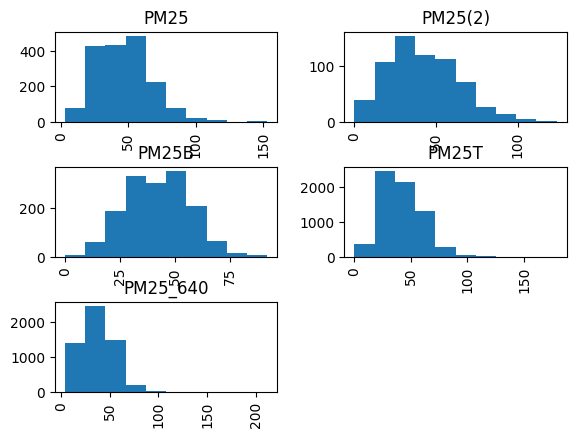

In [5]:
pm25 = df.loc[df.parameter.isin(['PM25', 'PM25(2)', 'PM25B', 'PM25T', 'PM25_640'])].copy()
pm25.hist('index_value', by='parameter')

array([[<Axes: title={'center': 'Avalon'}>,
        <Axes: title={'center': 'Clairton'}>,
        <Axes: title={'center': 'Lawrenceville'}>],
       [<Axes: title={'center': 'Liberty 2'}>,
        <Axes: title={'center': 'Lincoln'}>,
        <Axes: title={'center': 'North Braddock'}>],
       [<Axes: title={'center': 'Parkway East'}>,
        <Axes: title={'center': 'Pittsburgh'}>, <Axes: >]], dtype=object)

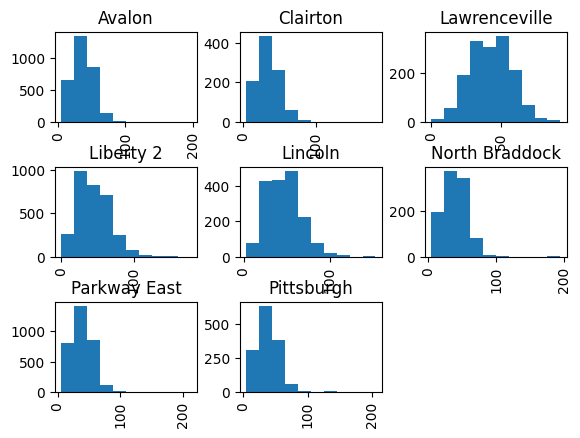

In [6]:
pm25.hist('index_value', by='site')

In [7]:
pm25['site_param'] = pm25.site + '_' + pm25.parameter
by_date = pm25.pivot(index='date', columns=['site', 'parameter'], values='index_value')
by_date['mean_pm25'] = by_date.mean(axis=1)
by_date['median_pm25'] = by_date.median(axis=1)
by_date

site,Lawrenceville,Lincoln,Liberty 2,Parkway East,Avalon,Liberty 2,Pittsburgh,Lawrenceville,North Braddock,Clairton,Avalon,Parkway East,Liberty 2,mean_pm25,median_pm25
parameter,PM25B,PM25,PM25(2),PM25T,PM25T,PM25T,PM25_640,PM25T,PM25_640,PM25_640,PM25_640,PM25_640,PM25_640,,
date,,,,,,,,,,,,,,,
2016-01-01,25.0,35.0,28.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.500000,29.500000
2016-01-02,40.0,52.0,42.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.250000,42.000000
2016-01-03,35.0,38.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,36.000000
2016-01-04,20.0,15.0,22.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,18.750000
2016-01-05,54.0,49.0,44.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.250000,48.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,38.0,31.0,38.0,38.0,32.0,35.666667,37.000000
2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,52.0,43.0,52.0,50.0,47.0,49.166667,50.000000


In [8]:
# is there ever multiple PM 2.5 parameter types at the same location on the same day?
# no, so we're always just looking at multiple locations, with different measurement devices
for site in pm25.site.unique():
    subset = by_date[site]
    notna = subset.notna().sum(axis=1)
    subsubset = subset.loc[notna > 1]
    if len(subsubset) > 0: print(site)

In [9]:
by_date_loc = pm25.pivot(index='date', columns='site', values='index_value')
#by_date_loc['mean_pm25'] = by_date_loc.mean(axis=1)
#by_date_loc['median_pm25'] = by_date_loc.median(axis=1)
by_date_loc

site,Avalon,Clairton,Lawrenceville,Liberty 2,Lincoln,North Braddock,Parkway East,Pittsburgh
date,,,,,,,,
2016-01-01,NaN,NaN,25.0,28.0,35.0,NaN,30.0,NaN
2016-01-02,NaN,NaN,40.0,42.0,52.0,NaN,39.0,NaN
2016-01-03,NaN,NaN,35.0,33.0,38.0,NaN,38.0,NaN
2016-01-04,NaN,NaN,20.0,22.0,15.0,NaN,18.0,NaN
2016-01-05,NaN,NaN,54.0,44.0,49.0,NaN,46.0,NaN
...,...,...,...,...,...,...,...,...
2024-12-02,38.0,31.0,NaN,32.0,NaN,38.0,38.0,37.0
2024-12-03,52.0,43.0,NaN,47.0,NaN,52.0,50.0,51.0
2024-12-04,48.0,36.0,NaN,52.0,NaN,50.0,40.0,46.0


In [10]:
# is there every Lawrenceville data and Pittsburgh data at the same time for PM 2.5?
# based on Allegheny County air quality website, I think those are the same location for PM2.5
# https://www.alleghenycounty.us/Services/Health-Department/Air-Quality
#
# ... yes for 2 weeks in 2021 HMMMMMM
# need to ask the data source about this
subset = by_date_loc[['Lawrenceville', 'Pittsburgh']]
notna = subset.notna().sum(axis=1)
subsubset = subset.loc[notna > 1]
len(subsubset)

13

<Axes: xlabel='date'>

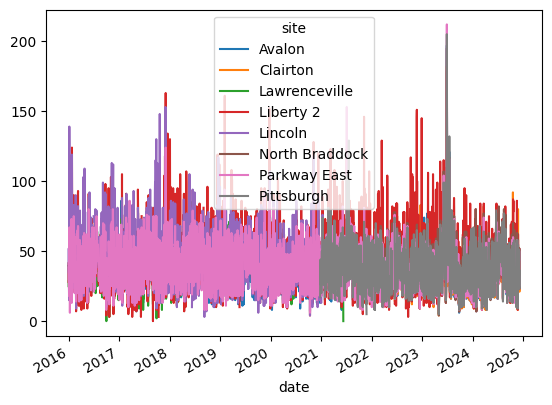

In [11]:
# location makes a difference!
# but arrest data is just for Pittsburgh anyway, not all of Allegheny county
by_date_loc.plot()

<Axes: xlabel='date'>

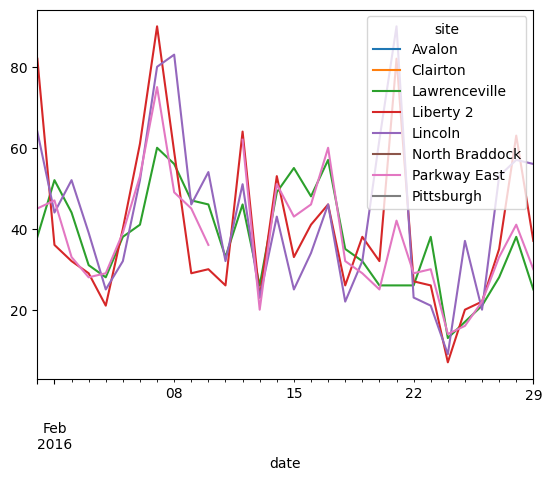

In [12]:
# zoom in to try to see cycles of variation
subset = by_date_loc.iloc[30:60]
subset.plot()

## SO2

<Axes: title={'center': 'SO2'}>

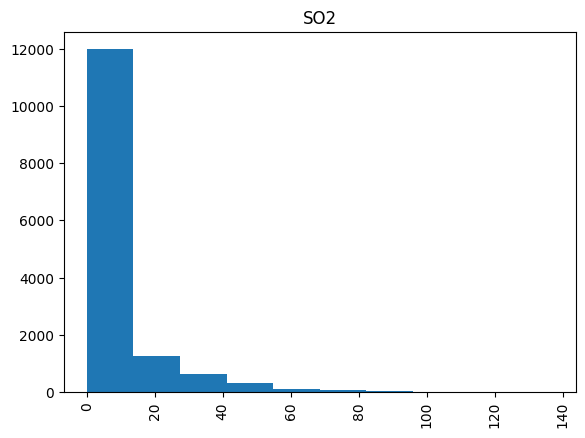

In [13]:
so2 = df.loc[df.parameter.isin(['SO2'])].copy()
so2.hist('index_value', by='parameter')

In [14]:
by_date_loc = so2.pivot(index='date', columns='site', values='index_value')
by_date_loc

site,Avalon,Clairton,Lawrenceville 2,Liberty,North Braddock,South Fayette,West Mifflin
date,,,,,,,
2016-01-01,10.0,NaN,1.0,3.0,1.0,3.0,NaN
2016-01-02,56.0,NaN,5.0,23.0,9.0,3.0,NaN
2016-01-03,40.0,NaN,2.0,20.0,7.0,3.0,NaN
2016-01-04,1.0,NaN,1.0,0.0,1.0,4.0,NaN
2016-01-05,21.0,NaN,27.0,21.0,20.0,11.0,NaN
...,...,...,...,...,...,...,...
2024-12-02,NaN,NaN,1.0,3.0,1.0,NaN,NaN
2024-12-03,NaN,NaN,1.0,3.0,0.0,NaN,NaN
2024-12-04,NaN,NaN,2.0,17.0,3.0,NaN,NaN
